# Mesopredator Release
Aaron Lopez &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 14 March 2016

&nbsp;&nbsp;&nbsp;&nbsp; As the world becomes increasingly connected, fewer natural habitats remain unaffected by human contact.  It is not uncommon for foreign animals to tag along human travelers as stowaways.  The consequences of this are catastrophic; indeed, we have been witness to hundreds of endemic extinctions in island ecosystems with the introduction of foreign species.  This can happen regardless of whether the intruder is an predator or simply a resource competitor.

&nbsp;&nbsp;&nbsp;&nbsp; In order to mitigate the endangerment of native species, the obvious approach might be to eradicate invading species.  However, the complexity of predator-prey relationships reveals that in some cases, complete elimination of alien predators or competitors might unintentionally accelerate native population extinction.

&nbsp;&nbsp;&nbsp;&nbsp; Franck Courchamp, et al. explain this apparent paradox by analyzing a 3-species model in an isolated environment, as in an island.  Particularly, they consider the stability of a system involving an alien superpredator (cats), an alien mesopredator (rats), and a native prey species (birds).  It is shown that careful control of  predator species can result in salvation of the native species, whereas eliminating the superpredator results in a population explosion of competitive mesopredators.

&nbsp;&nbsp;&nbsp;&nbsp; In this report, I illustrate the methods used by Courchamp, et al. to fully understand the implications of this important discovery.  For full appreciation, I recommend visiting https://github.com/aaron2220/Mesopredator-Release/blob/master/mesopredator%20release.ipynb to download the companion iPython notebook, which comes with interactive sliders to more intuitively understnd the nature of these dynamical systems.

In [1]:
%matplotlib inline
import numpy as np
from scipy import interpolate
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from astropy.table import Table
from astropy.io import ascii
from __future__ import print_function, division
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
from IPython.html import widgets
from IPython.display import display
from IPython.display import HTML

sns.set_style("white")
rc('axes',ec='Grey',lw=0.5)
#sns.set_style("whitegrid")

/Users/TARS/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [8]:
#COLORSCOLORSCOLORS
c = sns.hls_palette(5, l=.5, s=0.8)
rab = sns.cubehelix_palette(start=0.35, rot=2, light=0.7, dark=0.6, hue=4, reverse=True, as_cmap=True)
#sns.palplot(c)
#COLORSCOLROSCOSOLR

### rats vs birds
First, we study the behavior of the system if it were a simpler 2-species model.  The idea is to show that the distinction between species is important, particularly when a predator (mesopredator in this case) is not just killing its prey, but competing for more resources.  This case describes the bird/rat system, whose equations of motion are:
\begin{align}
\frac{dB}{dt} & = r_b B \left( 1 - \frac{B}{K_b} \right) - \frac{B}{S+B} \eta_b R  \\
\frac{dR}{dt} & = r_r R \left( 1 - \frac{\eta_b \eta_s R}{\eta_b S + \eta_s B} \right) \\
\end{align}
where 
<ul>
<li> $R,B,S = $ the population of rats, birds, and non-avian prey, respectively </li>
<li> $K_b = $ the carrying capacity (i.e. maximum <emph>sustainable</emph> population) of birds</li>
<li> $r_r, r_b = $ birth rate of rats and birds, respectively</li>
<li> $\eta_b, \eta_s =$ predation rate of rats on birds, and of rats on non-bird prey (seeds, invertebrates, etc) </li>
</ul>

Note that $K_r$, the carrying capacity for rats, depends on both the rats' current population of prey available to them.  In a sense, we would therefore expect rats to have a harder time populating the ecosystem, but we will see that this is not the case.

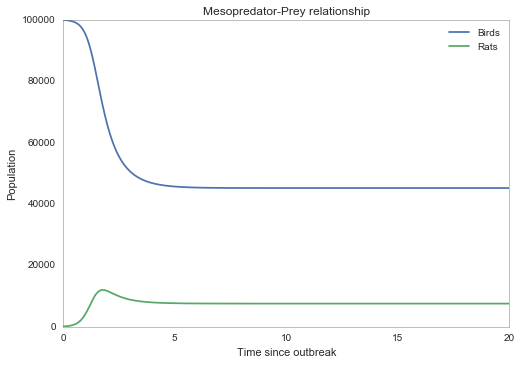

In [2]:
def ratbird_solve(B0,R0):
    # define the system dy/dt = f(y, t)
    def f(y, t):
        B = y[0]
        R = y[1]
        # the model equations 
        f1 = rb*B*(1-(B/Kb)) - nb*R*(B/(S+B)) # dB/dt
        f2 = rr*R*(1-(ns*nb*R)/(nb*S+ns*B))   # dR/dt
        return [f1, f2]
    # initial conditions
    y0 = [B0, R0]
    t  = np.linspace(0, 20, 1000)       # time
    # solve the DEs
    soln = odeint(f, y0, t)
    B = soln[:, 0]
    R = soln[:, 1]

    # plot results
    plt.figure()
    plt.plot(t, B, label='Birds')
    plt.plot(t, R, label='Rats')
    plt.xlabel('Time since outbreak')
    plt.ylabel('Population')
    plt.title('Mesopredator-Prey relationship')
    plt.legend(loc=0)
    
    
# CONSTANTS  
# birds
rb = 1.5  # birth rate
nb = 6.   # predation rate
Kb = 100000.   # carrying capacity
    # rats
rr = 4.0   # birth rate
    # non-avian food
S = 10000.    # total (constant and abundant)
ns = 365.   # predation rate

# solve the system dy/dt = f(y, t) -> F = y(t)
# initial conditions

#solve(f,B0,R0,t)
a_slider = widgets.FloatSliderWidget(min=0, max=100000, step=100, value=100000)
b_slider = widgets.FloatSliderWidget(min=0, max=10000, step=10, value=100)
w = widgets.interactive( ratbird_solve, B0=a_slider, R0=b_slider)
display(w)

The scaling differs from the plot in the literature due to their unspecified scaling.  This plot was made using 
<ul>
<li>$r_b = 1.5$</li>
<li>$\eta_b = 6$</li>
<li>$K_b = 100\,000$</li>
<li>$r_r = 4.0$ </li>
<li>$S = 10\,000$</li>
<li>$\eta_s = 365$ </li>
</ul>
as in the model used by Courchamp et al.  These parameters intend to approximate a natural system in isolation.  In the iPython notebook, sliders allow for them to be adjusted freely, but the the more generally important plot is the phase portrait below.

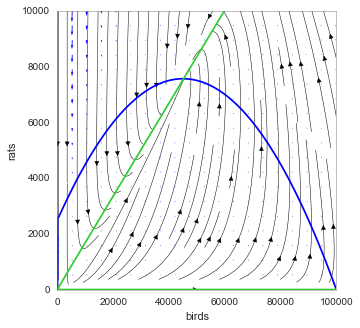

In [3]:
def ratbird_phase(rb,nb,rr,ns):
    fig, axis = plt.subplots(figsize=(5,5), dpi=600)
    # CONSTANTS  
    # birds
    Kb = 100000.   # carrying capacity
    # non-avian food
    S = 10000.    # total (constant and abundant)
    # Initial population values
    ax=0 # birds
    ay=0 # rats
    bx=100000 # birds
    by=10000 # rats

    # define the model equations 
    def f1(B,R):
        return rb*B*(1-(B/Kb)) - nb*R*(B/(S+B)) # dB/dt
    def f2(B,R):
        return rr*R*(1-(ns*nb*R)/(nb*S+ns*B))   # dR/dt
    
    #  Define two different 2D grids
    #  X1,Y1 represent the initial condition for the 
    #  trajectories. We also use them to plot the vector field
    Nx1=20
    Ny1=20
    xx1= np.linspace(ax,bx,Nx1)
    yy1= np.linspace(ay,by,Ny1)
    X1,Y1 = np.meshgrid(xx1,yy1)

    #  X,Y for computing nullclines and the trajectories
    Nx=200
    Ny=200
    xx= np.linspace(ax,bx,Nx)
    yy= np.linspace(ay,by,Ny)
    X,Y = np.meshgrid(xx,yy)
    
    # Nullclines
    levels = [0]
    c1 = axis.contour( X,Y,f1(X,Y), levels, antialiased=True, colors='blue', lw=0.5) # dx/dt=0
    c2 = axis.contour( X,Y,f2(X,Y), levels, antialiased=True, colors='limegreen', lw=0.5) # dy/dt=0

    # Trajectories
    axis.streamplot(X1, Y1, f1(X1,Y1),f2(X1,Y1), color='k', linewidth=0.5, cmap=plt.cm.winter)
    
    # Velocity field
    plt.quiver(X1,Y1, f1(X1,Y1),f2(X1,Y1), np.sqrt(f1(X1,Y1)**2+f2(X1,Y1)**2), cmap=plt.cm.winter)
    plt.xlabel(r'birds')
    plt.ylabel(r'rats')
    


rb_slider = widgets.FloatSliderWidget(min=0, max=10, step=0.01, value=1.5)
nb_slider = widgets.FloatSliderWidget(min=0, max=20, step=0.1, value=6.0)
rr_slider = widgets.FloatSliderWidget(min=0, max=10, step=0.01, value=4.0)
ns_slider = widgets.FloatSliderWidget(min=0, max=400, step=1, value=365.)
phase2D = widgets.interactive( ratbird_phase, rb=rb_slider, nb=nb_slider, rr=rr_slider, ns=ns_slider)
display(phase2D)

Above, the blue nullcline represents $dB/dt = 0$ and the green nullcline is $dR/dt = 0$.  The only stable fixed point is at the intersection of the two <emph>not</emph> on the axis.  The results are clear and intuitive:
<ul>
<li>Increasing $r_b$ increases the stable bird population.</li>
<li>Increasing $n_b$ <emph>or</emph> $n_s$ decreases the stable bird population, but increasing $n_s$ has the added detriment of increasing the stable rat population.</li>
<li>Changing $r_r$ does nothing to the geometry of the system, since $r_r$ doesn't directly affect birds in any way (until of course the rats interact with birds through $n_s$ or $n_b$). </li>
</ul>

Note that the stable point predicts a number of rats comparable, but less than, the number of birds.  This makes sense since the rats have more than birds in their diet.


### cats vs birds
Next, we study a 2-species system involving only cats and birds.  We can expect this system to favor bird survival, since cats do not compete with birds for their resources like rats do.  The logistic equation for this system is more trivial for the same reason.
\begin{align}
\frac{dB}{dt} & = r_b B \left( 1 - \frac{B}{K_b} \right) - \mu_b C  \\
\frac{dC}{dt} & = r_c C \left( 1 - \frac{\mu_b C}{B} \right) \\
\end{align}
where 
<ul>
<li> $C = $ the population of cats </li>
<li> $r_c = $ birth rate of cats</li>
<li> $\mu_b = $ predation rate of cats on birds </li>
</ul>

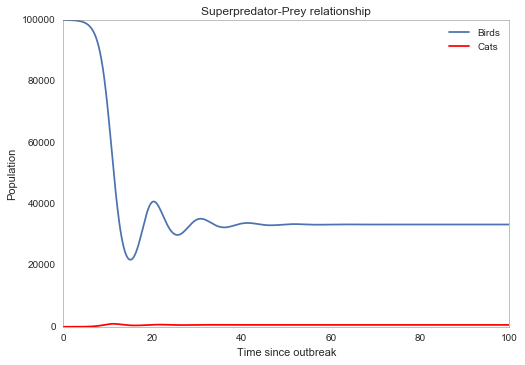

In [4]:
def catbird_solve(B0,C0):
    # define the system dy/dt = f(y, t)
    def f(y, t):
        B = y[0]
        C = y[1]
        # the model equations 
        f1 = rb*B*(1-(B/Kb)) - mub*C # dB/dt
        f2 = rc*C*(1-(mub*C)/(B))   # dC/dt
        return [f1, f2]
    # initial conditions
    y0 = [B0, C0]
    t  = np.linspace(0, 100, 1000.)       # time
    # solve the DEs
    soln = odeint(f, y0, t)
    B = soln[:, 0]
    C = soln[:, 1]

    # plot results
    plt.figure()
    plt.plot(t, B, label='Birds')
    plt.plot(t, C, label='Cats', color='r')
    plt.xlabel('Time since outbreak')
    plt.ylabel('Population')
    plt.title('Superpredator-Prey relationship')
    plt.legend(loc=0)
    
    
# CONSTANTS  
    # birds
rb = 1.5  # birth rate
mub = 54.   # predation rate
Kb = 100000.   # carrying capacity
    # cats
rc = 0.75   # birth rate

# solve the system dy/dt = f(y, t) -> F = y(t)
# initial conditions

#solve(f,B0,R0,t)
a_slider = widgets.FloatSliderWidget(min=0, max=100000, step=100, value=100000)
b_slider = widgets.FloatSliderWidget(min=0, max=1000, step=1, value=1)
w = widgets.interactive( catbird_solve, B0=a_slider, C0=b_slider)
display(w)

This plot was made using 
<ul>
<li>$r_b = 1.5$</li>
<li>$K_b = 100\,000$</li>
<li>$\mu_b = 54$</li>
<li>$r_c = 0.75$ </li>
</ul>
Again, the scaling is different from Courchamp et al's paper, but the characteristic behavior is the same.  Cat and bird populations oscillate because the carrying capacity for cats is directly related to the number of birds present.

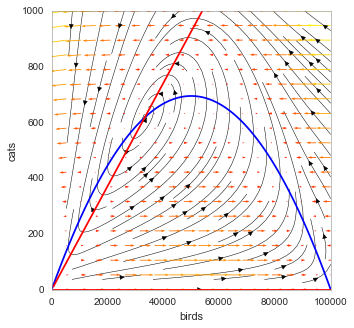

In [9]:
def catbird_phase(rb,mub,rc):
    fig, axis = plt.subplots(figsize=(5,5), dpi=600)
    # CONSTANTS  
    # birds
    Kb = 100000.   # carrying capacity
    # non-avian food
    S = 10000.    # total (constant and abundant)
    # Initial population values
    ax=0 # birds
    ay=0 # cats
    bx=100000 # birds
    by=1000 # cats

    # define the model equations 
    def f1(B,C):
        return rb*B*(1-(B/Kb)) - mub*C # dB/dt
    def f2(B,C):
        return rc*C*(1-(mub*C)/(B))   # dC/dt
    
    #  Define two different 2D grids
    #  X1,Y1 represent the initial condition for the 
    #  trajectories. We also use them to plot the vector field
    Nx1=20
    Ny1=20
    xx1= np.linspace(ax,bx,Nx1)
    yy1= np.linspace(ay,by,Ny1)
    X1,Y1 = np.meshgrid(xx1,yy1)

    #  X,Y for computing nullclines and the trajectories
    Nx=200
    Ny=200
    xx= np.linspace(ax,bx,Nx)
    yy= np.linspace(ay,by,Ny)
    X,Y = np.meshgrid(xx,yy)
    
    # Nullclines
    levels = [0]
    c1 = axis.contour( X,Y,f1(X,Y), levels, antialiased=True, colors='blue', lw=0.5) # dx/dt=0
    c2 = axis.contour( X,Y,f2(X,Y), levels, antialiased=True, colors='red', lw=0.5) # dy/dt=0

    # Trajectories
    axis.streamplot(X1, Y1, f1(X1,Y1),f2(X1,Y1), color='k', linewidth=0.5)
    
    # Velocity field
    plt.quiver(X1,Y1, f1(X1,Y1),f2(X1,Y1), np.sqrt(f1(X1,Y1)**2+f2(X1,Y1)**2), cmap=plt.cm.autumn)
    plt.xlabel(r'birds')
    plt.ylabel(r'cats')
    


rb_slider = widgets.FloatSliderWidget(min=0, max=10, step=0.01, value=1.5)
mub_slider = widgets.FloatSliderWidget(min=0, max=60, step=0.01, value=54)
rc_slider = widgets.FloatSliderWidget(min=0, max=5, step=0.01, value=0.75)
phase2D = widgets.interactive( catbird_phase, rb=rb_slider, mub=mub_slider, rc=rc_slider)
display(phase2D)

With any presence of cats, both populations will eventually spiral into stability.  Note that in this case, the cats are far more likely to go extinct, since they only have birds as their prey.  In the previous case involving rats, the survival of native birds depends entirely on the dietary preferences of rats.

It suffices to only show these two 2-species systems, since the rats in "cats vs rats" would only eat non-avian prey in the absence of birds, resulting in identical dynamics.

### cats vs rats vs birds
Finally, the 3-species set becomes more complex.  

\begin{align}
\frac{dB}{dt} & = r_b B \left( 1 - \frac{B}{K_b} \right) - \frac{B}{S+B} \eta_b R - \frac{B}{B+R} \mu_b C  \\
\frac{dR}{dt} & = r_r R \left( 1 - \frac{\eta_b \eta_s R}{\eta_b S + \eta_s B} \right) - \frac{R}{B+R} \mu_r C \\
\frac{dC}{dt} & = r_c C \left( 1 - \frac{\mu_b \mu_r C}{\eta_r B + \eta_b R} \right) \\
\end{align}

The only additional variable is $\mu_r$, the predation rate of cats on rats.  Though it seems like not much has changed, we have in fact introduced additional fixed points to the system.

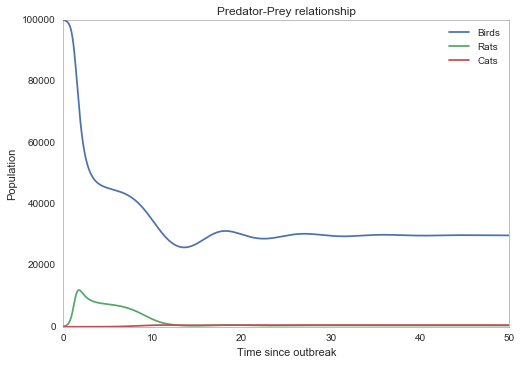

In [6]:
def solve(B0,R0,C0):
    # define the system dy/dt = f(y, t)
    def f(y, t):
        B = y[0]
        R = y[1]
        C = y[2]
        # the model equations 
        f1 = rb*B*(1-(B/Kb)) - nub*R*B/(S+B) - mub*C*B/(B+R) # dB/dt
        f2 = rr*R*(1-nub*nus*R/(nub*S+nus*B)) - mur*C*R/(B+R) # dR/dt
        f3 = rc*C*(1-(mub*mur*C)/(mur*B+mub*R))   # dC/dt
        return [f1, f2, f3]
    # initial conditions
    y0 = [B0, R0, C0]
    t  = np.linspace(0, 50, 1000)       # time
    # solve the DEs
    soln = odeint(f, y0, t)
    B = soln[:, 0]
    R = soln[:, 1]
    C = soln[:, 2]

    # plot results
    plt.figure()
    plt.plot(t, B, label='Birds')
    plt.plot(t, R, label='Rats')
    plt.plot(t, C, label='Cats')
    plt.xlabel('Time since outbreak')
    plt.ylabel('Population')
    plt.title('Predator-Prey relationship')
    plt.legend(loc=0)
    
    
# CONSTANTS  
    # birds
rb = 1.5  # birth rate
nub = 6.   # predation rate
mub = 54.
Kb = 100000.   # carrying capacity
    # rats
rr = 4.0   # birth rate
nus = 365.
mur = 200.
    # cats
rc = 0.75
    # non-avian food
S = 10000.    # total (constant and abundant)

#solve(f,B0,R0,t)
a_slider = widgets.FloatSliderWidget(min=0, max=100000, step=100, value=100000)
b_slider = widgets.FloatSliderWidget(min=0, max=10000, step=10, value=100)
c_slider = widgets.FloatSliderWidget(min=0, max=100, step=1, value=1)
w = widgets.interactive( solve, B0=a_slider, R0=b_slider, C0=c_slider)
display(w)

In [ ]:
def mesophase(nus,rb,nub,mub,rr,mur,rc,angle):
    fig = plt.figure(figsize=(8,8), dpi=600)
    axis = fig.add_subplot(111, projection='3d')
    # CONSTANTS  
    # birds
    Kb = 100000   # carrying capacity
    # non-avian food
    S = 10000.    # total (constant and abundant)
    # Initial population values
    ax=1 # birds
    ay=1 # rats
    az=1 # cats
    bx=100000 # birds
    by=10000 # rats
    bz=1000 # cats

    # define the model equations 
    def f1(B,R,C):
        return rb*B*(1-(B/Kb)) - nub*R*B/(S+B) - mub*C*B/(B+R) # dB/dt
    def f2(B,R,C):
        return rr*R*(1-nub*nus*R/(nub*S+nus*B)) - mur*C*R/(B+R) # dR/dt
    def f3(B,R,C):
        return rc*C*(1-(mub*mur*C)/(mur*B+mub*R))   # dC/dt
    
    #  Define two different 3D grids
    #  X1,Y1,Z1 represent the initial condition for the 
    #  trajectories. We also use them to plot the vector field
    Nx1=10
    Ny1=10
    Nz1=10
    xx1= np.linspace(ax,bx,Nx1)
    yy1= np.linspace(ay,by,Ny1)
    zz1= np.linspace(az,bz,Nz1)
    X1,Y1,Z1 = np.meshgrid(xx1,yy1,zz1)

    #  X,Y,Z for computing nullclines and the trajectories
    Nx=1000
    Ny=1000
    Nz=1000
    xx= np.linspace(ax,bx,Nx)
    yy= np.linspace(ay,by,Ny)
    zz= np.linspace(az,bz,Nz)
    X,Y,Z = np.meshgrid(xx,yy,zz)
    
    # Nullclines
    a = bx/Nx
    b = by/Ny
    c = bz/Nz
    null = 0
    vol1 = f1(X,Y,Z)
    verts1, faces1 = measure.marching_cubes(vol1, null, spacing=(a,b,c))
    axis.plot_trisurf(verts1[:, 0], verts1[:,1], faces1, verts1[:, 2],
                cmap='Blues', lw=0.01, alpha=0.8)
    vol2 = f2(X,Y,Z)
    verts2, faces2 = measure.marching_cubes(vol2, null, spacing=(a,b,c))
    axis.plot_trisurf(verts2[:, 0], verts2[:,1], faces2, verts2[:, 2],
                cmap='Greens', lw=0.01, alpha=0.8)
    vol3 = f3(X,Y,Z)
    verts3, faces3 = measure.marching_cubes(vol3, null, spacing=(a,b,c))
    axis.plot_trisurf(verts3[:, 0], verts3[:,1], faces3, verts3[:, 2],
                cmap='Reds', lw=0.01, alpha=0.8)
    
    # Velocity field
    plt.quiver(X1,Y1,Z1, f1(X1,Y1,Z1),f2(X1,Y1,Z1),f3(X1,Y1,Z1), color='k', lw=0.5, length=100)
    axis.set_xlabel('birds')
    axis.set_ylabel('rats')
    axis.set_zlabel('cats')
    axis.set_xlim(ax, bx)  
    axis.set_ylim(ay, by)  
    axis.set_zlim(az, bz)  
    axis.view_init(azim=angle)
    

nus_slider = widgets.FloatSliderWidget(min=0, max=400, step=1, value=365.)
rb_slider = widgets.FloatSliderWidget(min=0, max=5, step=0.01, value=1.5)
nub_slider = widgets.FloatSliderWidget(min=0, max=10, step=0.1, value=6.)
mub_slider = widgets.FloatSliderWidget(min=0, max=60, step=0.1, value=54.)
rr_slider = widgets.FloatSliderWidget(min=0, max=10, step=0.1, value=4.0)
mur_slider = widgets.FloatSliderWidget(min=0, max=300, step=1, value=200)
rc_slider = widgets.FloatSliderWidget(min=0, max=5, step=0.01, value=0.75)
ii_slider = widgets.FloatSliderWidget(min=0, max=360, step=0.01, value=190)
phase3D = widgets.interactive( mesophase, nus=nus_slider, rb=rb_slider, nub=nub_slider, mub=mub_slider, \
                              rr=rr_slider, mur=mur_slider, rc=rc_slider, angle=ii_slider)
display(phase3D)

This system is easily more complex, and with some patience and a good computer, it is simple to show that birds are almost inevitably doomed, if not for very careful population control of both cats and rats.  A more legible, and hence useful, presentation is to represent the third dimension (cats) as an elevation map.

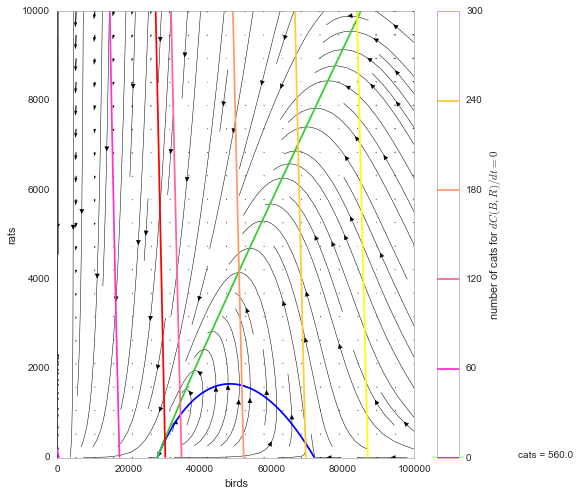

In [3]:
def mesophase(nus,rb,nub,mub,rr,mur,rc,C):
    fig = plt.figure(figsize=(8,8), dpi=600)
    axis = fig.add_subplot(111)
    # CONSTANTS  
    # birds
    Kb = 100000   # carrying capacity
    # non-avian food
    S = 10000.    # total (constant and abundant)
    # Initial population values
    ax=1 # birds
    ay=1 # rats
    az=1 # cats
    bx=100000 # birds
    by=10000 # rats
    bz=1000 # cats

    # define the model equations 
    def f1(B,R,C):
        return rb*B*(1-(B/Kb)) - nub*R*B/(S+B) - mub*C*B/(B+R) # dB/dt
    def f2(B,R,C):
        return rr*R*(1-nub*nus*R/(nub*S+nus*B)) - mur*C*R/(B+R) # dR/dt
    def f3(B,R,C):
        return rc*C*(1-(mub*mur*C)/(mur*B+mub*R))   # dC/dt
    
    #  Define two different 2D grids
    #  X1,Y1 represent the initial condition for the 
    #  trajectories. We also use them to plot the vector field
    Nx1=20
    Ny1=20
    xx1= np.linspace(ax,bx,Nx1)
    yy1= np.linspace(ay,by,Ny1)
    X1,Y1 = np.meshgrid(xx1,yy1)

    #  X,Y for computing nullclines and the trajectories
    Nx=200
    Ny=200
    Nz=200
    xx= np.linspace(ax,bx,Nx)
    yy= np.linspace(ay,by,Ny)
    zz= np.linspace(az,bz,Nz)
    X,Y = np.meshgrid(xx,yy)
    
    # Nullclines
    levels = [0]
    c1 = axis.contour( X,Y,f1(X,Y,C), 0, antialiased=True, colors='blue', lw=0.5) # dx/dt=0
    c2 = axis.contour( X,Y,f2(X,Y,C), 0, antialiased=True, colors='limegreen', lw=0.5) # dy/dt=0
    c3 = axis.contour( X,Y,f3(X,Y,C), 0, antialiased=True, colors='red', lw=0.5)
    heat = axis.contour( X,Y,f3(X,Y,zz), antialiased=True, cmap=plt.cm.spring)
    # Trajectories
    axis.streamplot(X1, Y1, f1(X1,Y1,C),f2(X1,Y1,C), color='k', linewidth=0.5, cmap=plt.cm.winter)
    
    # Velocity field
    plt.quiver(X1,Y1, f1(X1,Y1,C),f2(X1,Y1,C), color='k')# np.sqrt(f1(X1,Y1,C)**2+f2(X1,Y1,C)**2), cmap=plt.cm.winter)
    plt.xlabel('birds')
    plt.ylabel('rats')
    cb = plt.colorbar(heat).set_label(r'number of cats for $dC(B,R)/dt = 0$')
    fig.text(0.925,0.125,'cats = %s' % C)
    

nus_slider = widgets.FloatSliderWidget(min=0, max=400, step=1, value=365.)
rb_slider = widgets.FloatSliderWidget(min=0, max=5, step=0.01, value=1.5)
nub_slider = widgets.FloatSliderWidget(min=0, max=10, step=0.1, value=6.)
mub_slider = widgets.FloatSliderWidget(min=0, max=60, step=0.1, value=54.)
rr_slider = widgets.FloatSliderWidget(min=0, max=10, step=0.1, value=4.0)
mur_slider = widgets.FloatSliderWidget(min=0, max=300, step=1, value=200)
rc_slider = widgets.FloatSliderWidget(min=0, max=5, step=0.01, value=0.75)
C_slider = widgets.FloatSliderWidget(min=0, max=1000, step=1, value=560)
catplot = widgets.interactive( mesophase, nus=nus_slider, rb=rb_slider, nub=nub_slider, mub=mub_slider, \
                              rr=rr_slider, mur=mur_slider, rc=rc_slider, C=C_slider)
display(catplot)

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
